In [1]:
# Let printing work the same in Python 2 and 3
from __future__ import print_function

# Matplotlib
## Introduction
Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes. First, allow for interactive, cross-platform control of figures and plots, and second, to make it very easy to produce static raster or vector graphics files without the need for any GUIs. Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

## Online Documentation
The [matplotlib.org](http://matplotlib.org) project website is the primary online resource for the library's documentation. It contains [examples](http://matplotlib.org/examples/index.html), [FAQs](http://matplotlib.org/faq/index.html), [API documentation](http://matplotlib.org/api/index.html), and, most importantly, the [gallery](http://matplotlib.org/gallery.html).

## Github repository
### Location
[Matplotlib](https://github.com/matplotlib) is hosted by GitHub.

### Bug Reports and feature requests
So, you think you found a bug? Or maybe you think some feature is just too difficult to use? Or missing altogether? Submit your bug reports [here](https://github.com/matplotlib/matplotlib/issues) at Matplotlib's issue tracker. We even have a process for submitting and discussing Matplotlib Enhancement Proposals ([MEPs](http://matplotlib.org/devdocs/devel/MEP/index.html)).

# Quick note on "backends" and Jupyter notebooks
Matplotlib has multiple backends. The backends allow mpl to be used on a variety of platforms with a variety of GUI toolkits (GTK, Qt, Wx, etc.), all of them written so that most of the time, you will not need to care which backend you are using. 

In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

2.2.2
module://ipykernel.pylab.backend_inline


Normally we wouldn't need to think about this too much, but IPython/Jupyter notebooks behave a touch differently than "normal" python.

Inside of IPython, it's often easiest to use the Jupyter ``nbagg`` or ``notebook`` backend.  This allows plots to be displayed and interacted with in the browser in a Jupyter notebook.  Otherwise, figures will pop up in a separate GUI window.

We can do this in two ways:

1. The IPython ``%matplotlib backend_name`` "magic" command (or ``plt.ion()``, which behaves similarly)
   - Figures will be shown automatically by IPython, even if you don't call ``plt.show()``.
     
2. ``matplotlib.use("backend_name")``
   - Figures will only be shown when you call ``plt.show()``.

Here, we'll use the second method for one simple reason: it allows our code to behave the same way regardless of whether we run it inside of an Jupyter notebook or from a python script at the command line.  Feel free to use the ``%matplotlib`` magic command if you'd prefer.

One final note: You will always need to do this before you ``import matplotlib.pyplot as plt``.

In [3]:
matplotlib.use('nbagg')

# On with the show!
Matplotlib is a large project and can seem daunting at first. However, by learning the components, it should begin to feel much smaller and more approachable.

## Anatomy of a "Plot"

People use "plot" to mean many different things.  Here, we'll be using a consistent terminology (mirrored by the names of the underlying classes, etc):

<img src="images/figure_axes_axis_labeled.png">

The ``Figure`` is the top-level container in this hierarchy.  It is the overall window/page that everything is drawn on.  You can have multiple independent figures and ``Figure``s can contain multiple ``Axes``. 

Most plotting ocurs on an ``Axes``.  The axes is effectively the area that we plot data on and any ticks/labels/etc associated with it.  Usually we'll set up an Axes with a call to ``subplot`` (which places Axes on a regular grid), so in most cases, ``Axes`` and ``Subplot`` are synonymous.

Each ``Axes`` has an ``XAxis`` and a ``YAxis``.  These contain the ticks, tick locations, labels, etc.  In this tutorial, we'll mostly control ticks, tick labels, and data limits through other mechanisms, so we won't touch the individual ``Axis`` part of things all that much.  However, it is worth mentioning here to explain where the term ``Axes`` comes from.


## Getting Started

In this tutorial, we'll use the following import statements. These abbreviations are semi-standardized, and most tutorials, other scientific python code that you'll find elsewhere will use them as well.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Figures

Now let's create a figure...

In [5]:
fig = plt.figure()

Awww, nothing happened! This is because by default mpl will not show anything until told to do so, as we mentioned earlier in the "backend" discussion.

Instead, we'll need to call ``plt.show()``

<IPython.core.display.Javascript object>


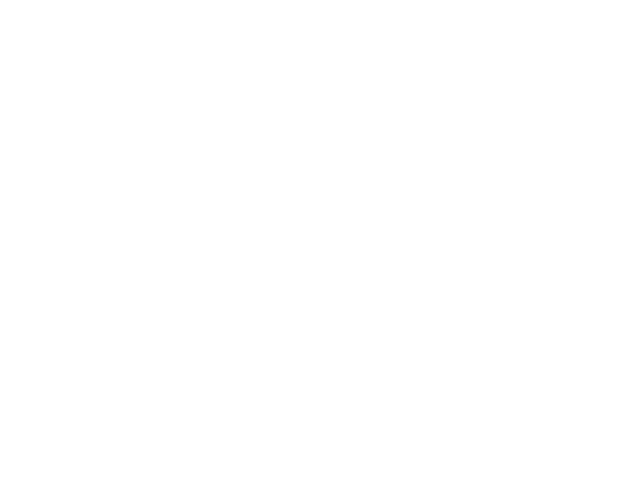

In [6]:
plt.show()

Great, a blank figure! Not terribly useful yet.

However, while we're on the topic, you can control the size of the figure through the ``figsize`` argument, which expects a tuple of ``(width, height)`` in inches. 

A really useful utility function is [`figaspect`](http://matplotlib.org/api/figure_api.html?highlight=figaspect#matplotlib.figure.figaspect)

<IPython.core.display.Javascript object>


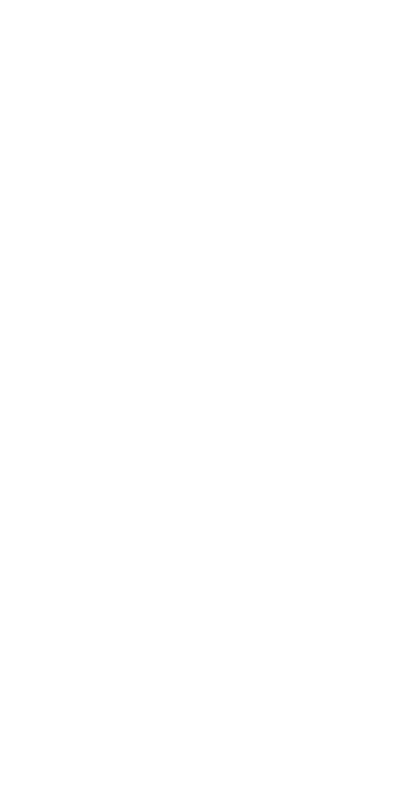

In [7]:
# Twice as tall as it is wide:
fig = plt.figure(figsize=plt.figaspect(2.0))
plt.show()

# Axes

All plotting is done with respect to an [`Axes`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes). An *Axes* is made up of [`Axis`](http://matplotlib.org/api/axis_api.html#matplotlib.axis.Axis) objects and many other things. An *Axes* object must belong to a *Figure* (and only one *Figure*). Most commands you will ever issue will be with respect to this *Axes* object.

Typically, you'll set up a `Figure`, and then add an `Axes` to it. 

You can use `fig.add_axes`, but in most cases, you'll find that adding a subplot will fit your needs perfectly. (Again a "subplot" is just an axes on a grid system.) 

<IPython.core.display.Javascript object>


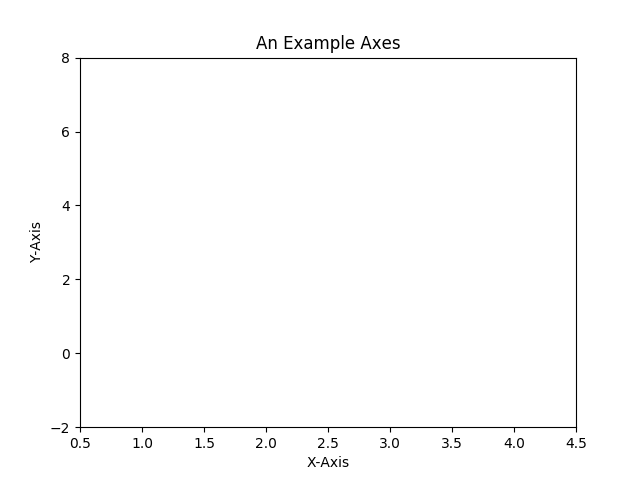

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111) # We'll explain the "111" later. Basically, 1 row and 1 column.
ax.set(xlim=[0.5, 4.5], ylim=[-2, 8], title='An Example Axes',
       ylabel='Y-Axis', xlabel='X-Axis')
plt.show()


Notice the call to ``set``. Matplotlib's objects typically have lots of "explicit setters" -- in other words, functions that start with ``set_<something>`` and control a particular option. 

To demonstrate this (and as an example of IPython's tab-completion), try typing `ax.set_` in a code cell, then hit the `<Tab>` key.  You'll see a long list of `Axes` methods that start with `set`.

For example, we could have written the third line above as:

In [9]:
ax.set_xlim([0.5, 4.5])
ax.set_ylim([-2, 8])
ax.set_title('An Example Axes')
ax.set_ylabel('Y-Axis')
ax.set_xlabel('X-Axis')

Text(0.5,0,'X-Axis')

Clearly this can get repitive quickly.  Therefore, Matplotlib's `set` method can be very handy.  It takes each kwarg you pass it and tries to call the corresponding "setter".  For example, `foo.set(bar='blah')` would call `foo.set_bar('blah')`.

Note that the `set` method doesn't just apply to `Axes`; it applies to more-or-less all matplotlib objects.

However, there are cases where you'll want to use things like `ax.set_xlabel('Some Label', size=25)` to control other options for a particular function.

## Basic Plotting

Most plotting happens on an `Axes`.  Therefore, if you're plotting something on an axes, then you'll use one of its methods.

We'll talk about different plotting methods in more depth in the next section.  For now, let's focus on two methods: `plot` and `scatter`.

`plot` draws points with lines connecting them.  `scatter` draws unconnected points, optionally scaled or colored by additional variables.

As a basic example:

<IPython.core.display.Javascript object>


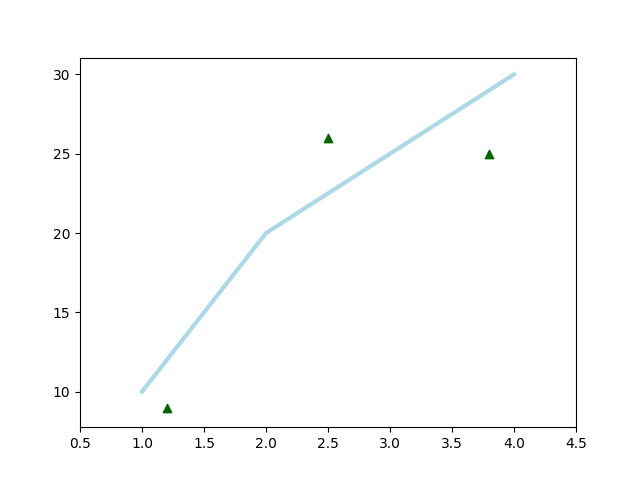

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
ax.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
ax.set_xlim(0.5, 4.5)
plt.show()

## Axes methods vs. pyplot

Interestingly, just about all methods of an *Axes* object exist as a function in the *pyplot* module (and vice-versa). For example, when calling `plt.xlim(1, 10)`, *pyplot* calls `ax.set_xlim(1, 10)` on whichever *Axes* is "current". Here is an equivalent version of the above example using just pyplot.

<IPython.core.display.Javascript object>


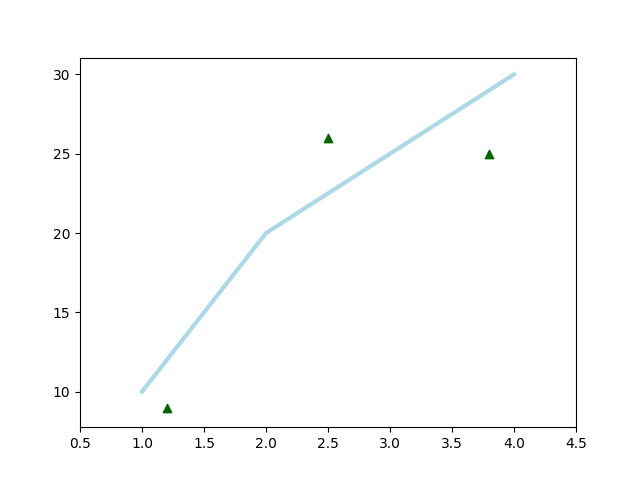

In [11]:
plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')
plt.xlim(0.5, 4.5)
plt.show()

Much cleaner, and much clearer! So, why will most of my examples not follow the pyplot approach? Because [PEP20](http://www.python.org/dev/peps/pep-0020/) "The Zen of Python" says:

"Explicit is better than implicit"

While very simple plots, with short scripts would benefit from the conciseness of the pyplot implicit approach, when doing more complicated plots, or working within larger scripts, you will want to explicitly pass around the *Axes* and/or *Figure* object to operate upon.

The advantage of keeping which axes we're working with very clear in our code will become more obvious when we start to have multiple axes in one figure.

### Multiple Axes

We've mentioned before that a figure can have more than one `Axes` on it.  If you want your axes to be on a regular grid system, then it's easiest to use `plt.subplots(...)` to create a figure and add the axes to it automatically.

For example:

<IPython.core.display.Javascript object>


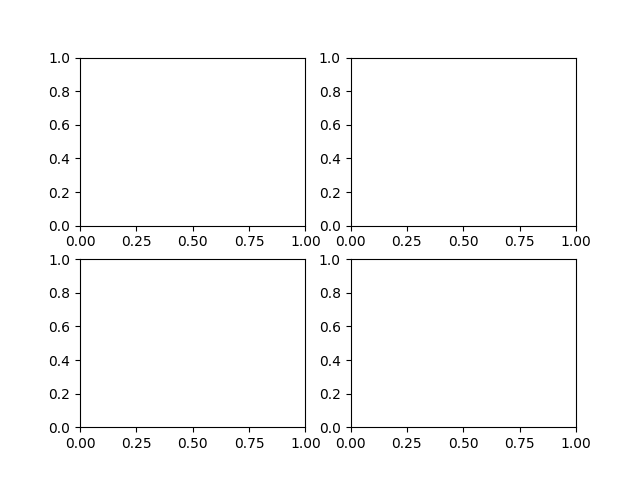

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2)
plt.show()

`plt.subplots(...)` created a new figure and added 4 subplots to it.  The `axes` object that was returned is a 2D numpy object array.  Each item in the array is one of the subplots.  They're laid out as you see them on the figure.  

Therefore, when we want to work with one of these axes, we can index the `axes` array and use that item's methods.

For example:

<IPython.core.display.Javascript object>


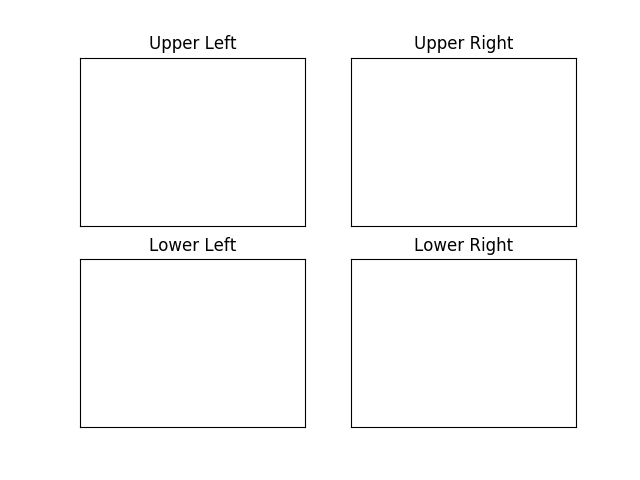

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0,0].set(title='Upper Left')
axes[0,1].set(title='Upper Right')
axes[1,0].set(title='Lower Left')
axes[1,1].set(title='Lower Right')

# To iterate over all items in a multidimensional numpy array, use the `flat` attribute
for ax in axes.flat:
    # Remove all xticks and yticks...
    ax.set(xticks=[], yticks=[])
    
plt.show()

One really nice thing about `plt.subplots()` is that when it's called with no arguments, it creates a new figure with a single subplot. 

Any time you see something like

```
fig = plt.figure()
ax = fig.add_subplot(111)
```

You can replace it with:

```
fig, ax = plt.subplots()
```

We'll be using that approach for the rest of the examples.  It's much cleaner.  

However, keep in mind that we're still creating a figure and adding axes to it.  When we start making plot layouts that can't be described by `subplots`, we'll go back to creating the figure first and then adding axes to it one-by-one.

# Exercise

Let's use some of what we've been talking about.  Can you reproduce this figure?

<img src="images/exercise_1-1.png">

Here's the data and some code to get you started.

In [ ]:
# %load exercises/1.1-subplots_and_basic_plotting.py
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?


In [14]:
plt.style.use('classic')

# Try to reproduce the figure shown in images/exercise_1-1.png

# Our data...
x = np.linspace(0, 10, 100)
y1, y2, y3 = np.cos(x), np.cos(x + 1), np.cos(x + 2)
names = ['Signal 1', 'Signal 2', 'Signal 3']

# Can you figure out what to do next to plot x vs y1, y2, and y3 on one figure?


# Visual Overview of Plotting Functions

We've talked a lot about laying things out, etc, but we haven't talked about actually plotting data yet. Matplotlib has a number of different plotting functions -- many more than we'll cover here, in fact. There's a more complete list in the pyplot documentation, and Matplotlib gallery is a great place to get examples of all of them.  

However, a full list and/or the gallery can be a bit overwhelming at first. Instead we'll condense it down and give you a look at some of the ones you're most likely to use, and then go over a subset of those in more detail.

Here's a simplified visual overview of matplotlib's most commonly used plot types.  Let's browse through these, and then we'll go over a few in more detail. Clicking on any of these images will take you to the code that generated them. We'll skip that for now, but feel browse through it later.

## The Basics: 1D series/points
### What we've mentioned so far
<a  href="examples/plot_example.py"><img src="images/plot_example.png"></a>
<a href="examples/scatter_example.py"><img src="images/scatter_example.png"></a>
### Other common plot types
<a href="examples/bar_example.py"><img src="images/bar_example.png"></a>
<a href="examples/fill_example.py"><img src="images/fill_example.png"></a>

## Data Distributions
<a href="examples/statistical_example.py"><img src="images/statistical_example.png"></a>

# Detailed Examples (of a few of these)

# Input Data: 1D Series

We've briefly mentioned `ax.plot(x, y)` and `ax.scatter(x, y)` to draw lines and points, respectively.  We'll cover some of their options (markers, colors, linestyles, etc) in the next section. Let's move on to a couple of other common plot types.

### Bar Plots: `ax.bar(...)` and `ax.barh(...)`
<img src="images/bar_example.png">

Bar plots are one of the most common plot types.  Matplotlib's `ax.bar(...)` method can also plot general rectangles, but the default is optimized for a simple sequence of x, y values, where the rectangles have a constant width.  There's also `ax.barh(...)` (for horizontal), which makes a constant-height assumption instead of a constant-width assumption.

<IPython.core.display.Javascript object>


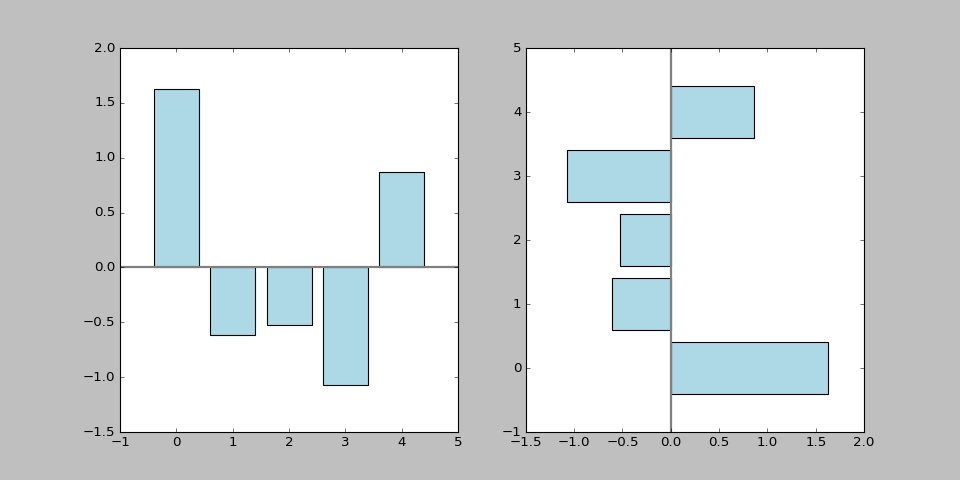

In [15]:
np.random.seed(1)
x = np.arange(5)
y = np.random.randn(5)

fig, axes = plt.subplots(ncols=2, figsize=plt.figaspect(1./2))

vert_bars = axes[0].bar(x, y, color='lightblue', align='center')
horiz_bars = axes[1].barh(x, y, color='lightblue', align='center')

# I'll also introduce axhline & axvline to draw a line all the way across the axes
# This can be a quick-n-easy way to draw an axis "spine".
axes[0].axhline(0, color='gray', linewidth=2)
axes[1].axvline(0, color='gray', linewidth=2)

plt.show()

Note that we held on to what `ax.bar(...)` returned.  Matplotlib plotting methods return an `Artist` or a sequence of artists.  Anything you can see in a Matplotlib figure/axes/etc is an `Artist` of some sort. Most of the time, you will not need to retain these returned objects. You will want to capture them for special customizing that may not be possible through the normal plotting mechanism.

Let's re-visit that last example and modify what's plotted.  In the case of `bar`, a container artist is returned, so we'll modify its contents instead of the container itself (thus, `for bar in vert_bars`).

<IPython.core.display.Javascript object>


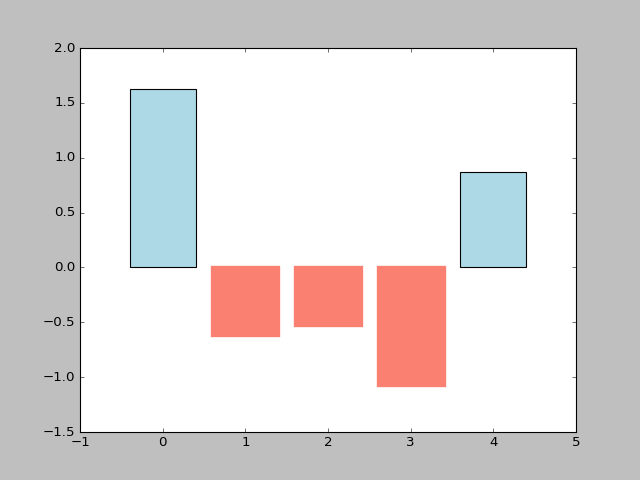

In [16]:
fig, ax = plt.subplots()
vert_bars = ax.bar(x, y, color='lightblue', align='center')

# We could have also done this with two separate calls to `ax.bar` and numpy boolean indexing.
for bar, height in zip(vert_bars, y):
    if height < 0:
        bar.set(edgecolor='darkred', color='salmon', linewidth=3)

plt.show()

### Filled Regions: `ax.fill(x, y)`, `fill_between(...)`, etc
<img src="images/fill_example.png">

Of these functions, `ax.fill_between(...)` is probably the one you'll use the most often.  In its most basic form, it fills between the given y-values and 0:

<IPython.core.display.Javascript object>


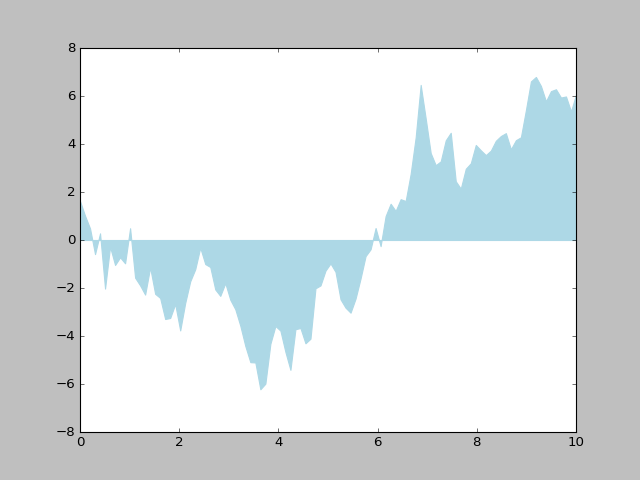

In [17]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')
plt.show()

However, it can also be used to fill between two curves.  This is particularly useful when you want to show an envelope of some sort (e.g. error, confidence, amplitude, etc).

<IPython.core.display.Javascript object>


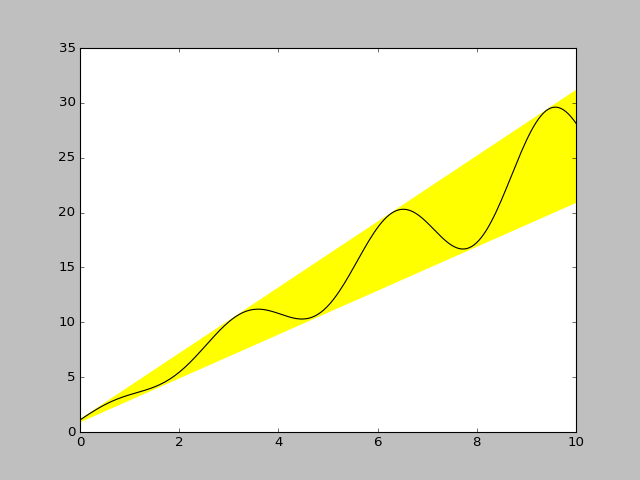

In [18]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')

plt.show()

## `data` keyword argument
When using specialized data structures such as Pandas DataFrame and XArray, the input data to be plotted are accessed like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the `data` keyword argument was added to many of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

<IPython.core.display.Javascript object>


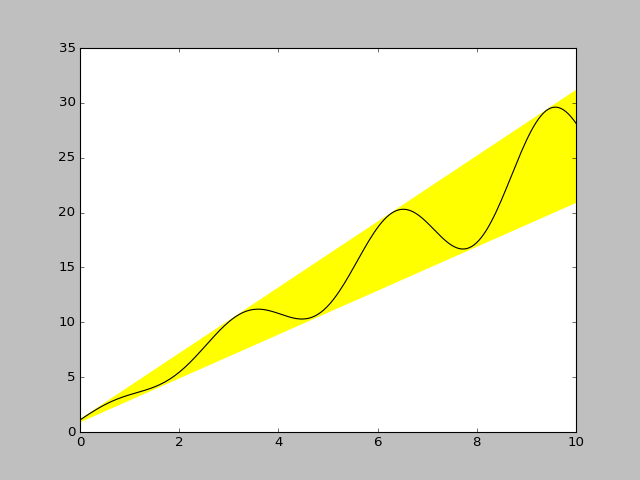

In [19]:
x = np.linspace(0, 10, 200)
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between('x', 'y1', 'y2', color='yellow', data=data_obj)

# Plot the "centerline" with `plot`
ax.plot('x', 'mean', color='black', data=data_obj)

plt.show()

# Exercise

Now let's try combining `bar` and `fill_between` to make a nice prediction of what will happen as this class progresses:

Can you reproduce the figure below?
<img src="images/exercise_2.1-bar_and_fill_between.png">

In [20]:
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!


# Limits, Legends, and Layouts

In this section, we'll focus on what happens around the edges of the axes:  Ticks, ticklabels, limits, layouts, and legends.

# Limits and autoscaling

By default, Matplotlib will attempt to determine limits for you that encompasses all the data you have plotted.  This is the "autoscale" feature. For image plots, the limits are not padded while plots such as scatter plots and bar plots are given some padding.

<IPython.core.display.Javascript object>


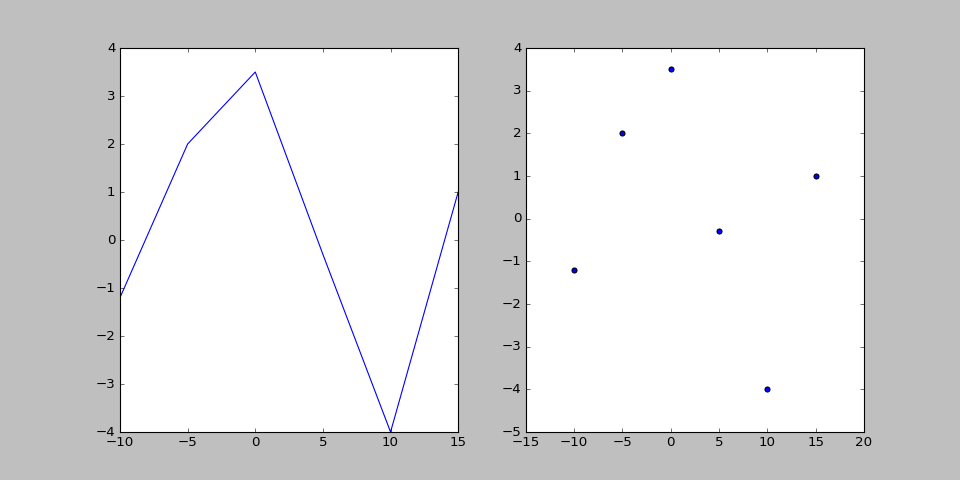

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

plt.show()

### `ax.margins(...)`

If you'd like to add a bit of "padding" to a plot, `ax.margins(<some_small_fraction>)` is a very handy way to do so.  Instead of choosing "even-ish" numbers as min/max ranges for each axis, `margins` will make Matplotlib calculate the min/max of each axis by taking the range of the data and adding on a fractional amount of padding.

As an example:

<IPython.core.display.Javascript object>


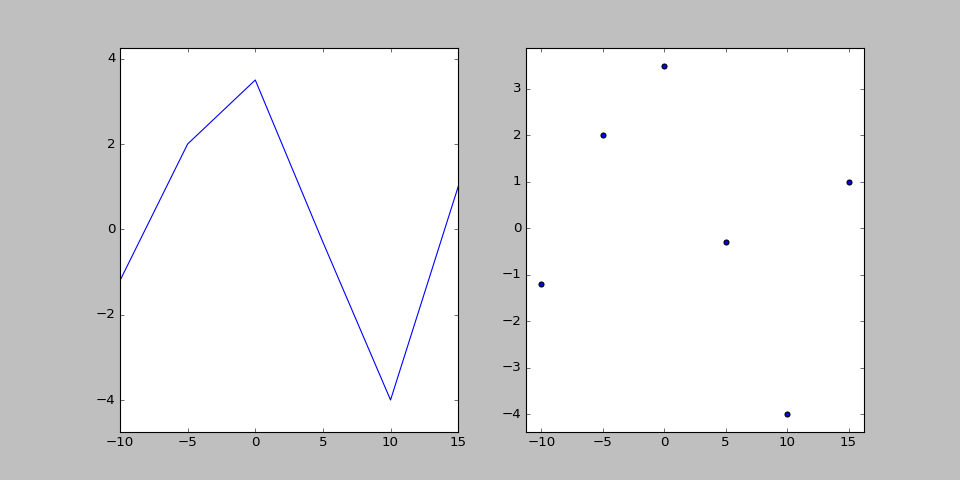

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))

ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

ax1.margins(x=0.0, y=0.1) # 10% padding in the y-direction only
ax2.margins(0.05) # 5% padding in all directions

plt.show()

### `ax.axis(...)`

The `ax.axis(...)` method is a convienent way of controlling the axes limits and enabling/disabling autoscaling.

If you ever need to get all of the current plot limits, calling `ax.axis()` with no arguments will return the xmin/max/etc:

    xmin, xmax, ymin, ymax = ax.axis()
    
If you'd like to manually set all of the x/y limits at once, you can use `ax.axis` for this, as well (note that we're calling it with a single argument that's a sequence, not 4 individual arguments):

    ax.axis([xmin, xmax, ymin, ymax])
    
However, you'll probably use `axis` mostly with either the `"tight"` or `"equal"` options. There are other options as well; see the documentation for full details.  In a nutshell, though:

  * *tight*: Set axes limits to the exact range of the data
  * *equal*: Set axes scales such that one cm/inch in the y-direction is the same as one cm/inch in the x-direction. In Matplotlib terms, this sets the aspect ratio of the plot to 1.  That _doesn't_ mean that the axes "box" will be square.
  
And as an example:

<IPython.core.display.Javascript object>


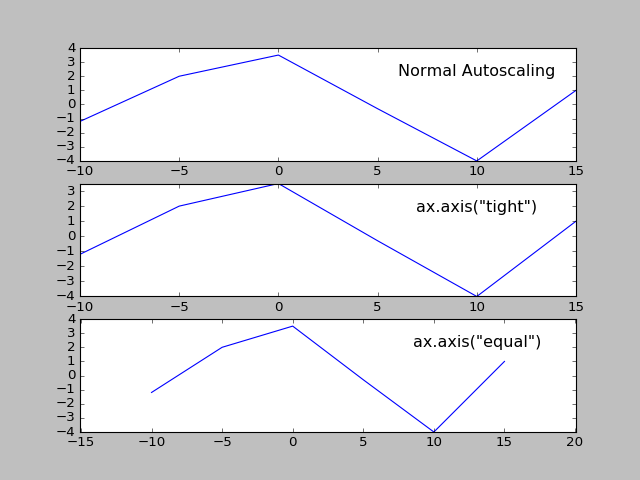

In [23]:
fig, axes = plt.subplots(nrows=3)

for ax in axes:
    ax.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])

axes[0].set_title('Normal Autoscaling', y=0.7, x=0.8)

axes[1].set_title('ax.axis("tight")', y=0.7, x=0.8)
axes[1].axis('tight')

axes[2].set_title('ax.axis("equal")', y=0.7, x=0.8)
axes[2].axis('equal')

plt.show()

### Manually setting only one limit

Another trick with limits is to specify only half of a limit. When done **after** a plot is made, this has the effect of allowing the user to anchor a limit while letting Matplotlib autoscale the rest of it.

<IPython.core.display.Javascript object>


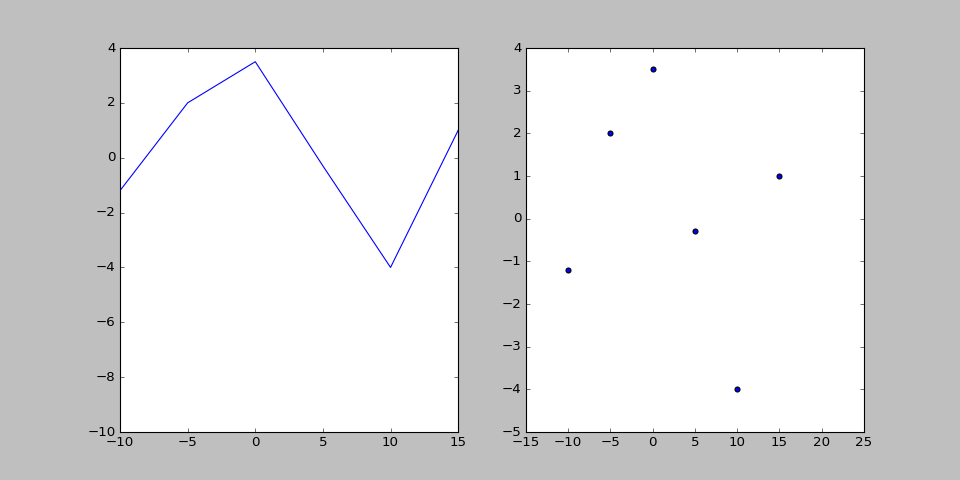

In [24]:
# Good -- setting limits after plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
plt.show()

<IPython.core.display.Javascript object>


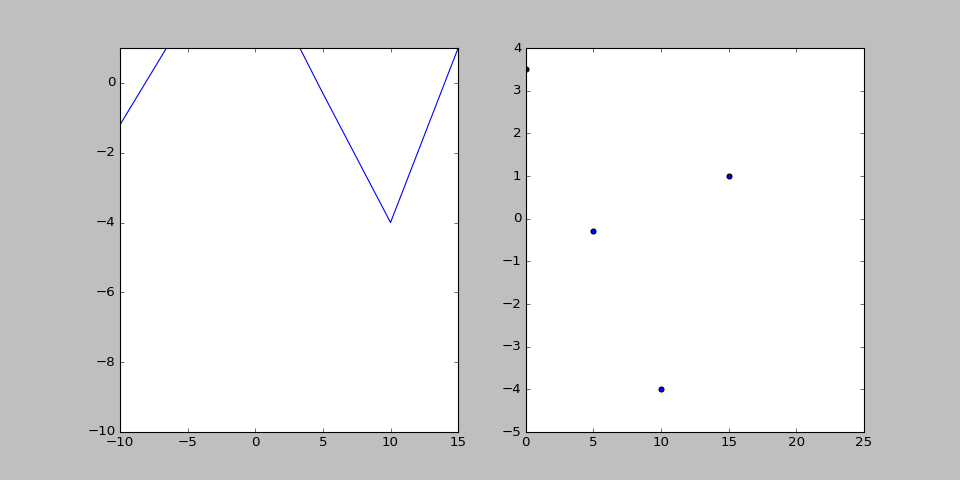

In [25]:
# Bad -- Setting limits before plotting is done
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(0.5))
ax1.set_ylim(bottom=-10)
ax2.set_xlim(right=25)
ax1.plot([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
ax2.scatter([-10, -5, 0, 5, 10, 15], [-1.2, 2, 3.5, -0.3, -4, 1])
plt.show()

# Legends

As you've seen in some of the examples so far, the X and Y axis can also be labeled, as well as the subplot itself via the title. 

However, another thing you can label is the line/point/bar/etc that you plot.  You can provide a label to your plot, which allows your legend to automatically build itself. 

<IPython.core.display.Javascript object>


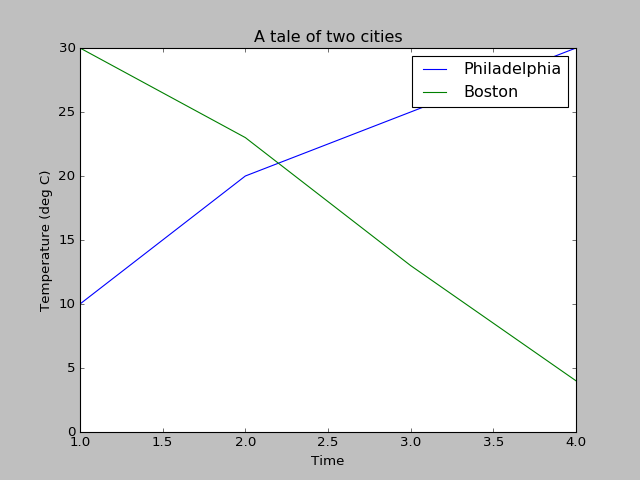

In [26]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Philadelphia')
ax.plot([1, 2, 3, 4], [30, 23, 13, 4], label='Boston')
ax.set(ylabel='Temperature (deg C)', xlabel='Time', title='A tale of two cities')
ax.legend()
plt.show()

In `classic` mode, legends will go in the upper right corner by default (you can control this with the `loc` kwarg). As of v2.0, by default Matplotlib will choose a location to avoid overlapping plot elements as much as possible. To force this option, you can pass in:

    ax.legend(loc="best")
    
Also, if you happen to be plotting something that you do not want to appear in the legend, just set the label to "\_nolegend\_".

<IPython.core.display.Javascript object>


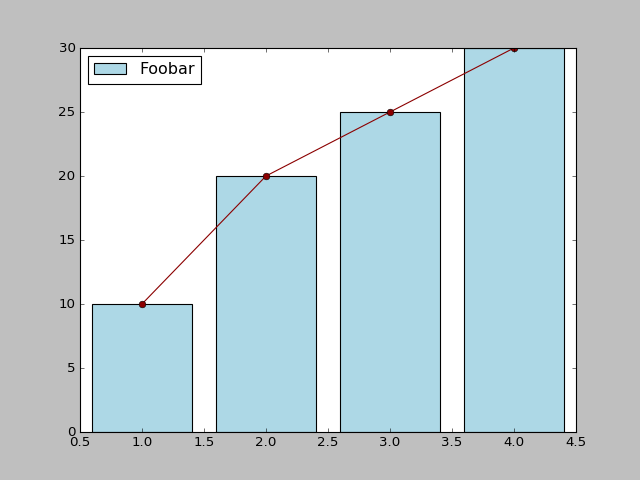

In [27]:
fig, ax = plt.subplots(1, 1)
ax.bar([1, 2, 3, 4], [10, 20, 25, 30], label="Foobar", align='center', color='lightblue')
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label="_nolegend_", marker='o', color='darkred')
ax.legend(loc='best')
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')

t = np.linspace(0, 2 * np.pi, 150)
x1, y1 = np.cos(t), np.sin(t)
x2, y2 = 2 * x1, 2 * y1

colors = ['darkred', 'darkgreen']

# Try to plot the two circles, scale the axes as shown and add a legend
# Hint: it's easiest to combine `ax.axis(...)` and `ax.margins(...)` to scale the axes

# Dealing with the boundaries: Layout, ticks, spines, etc

One key thing we haven't talked about yet is all of the annotation on the outside of the axes, the borders of the axes, and how to adjust the amount of space around the axes.  We won't go over every detail, but this next section should give you a reasonable working knowledge of how to configure what happens around the edges of your axes.

## Ticks, Tick Lines, Tick Labels and Tickers
This is a constant source of confusion:

* A Tick is the *location* of a Tick Label.
* A Tick Line is the line that denotes the location of the tick.
* A Tick Label is the text that is displayed at that tick.
* A [`Ticker`](http://matplotlib.org/api/ticker_api.html#module-matplotlib.ticker) automatically determines the ticks for an Axis and formats the tick labels.

[`tick_params()`](http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.tick_params) is often used to help configure your tickers.

<IPython.core.display.Javascript object>


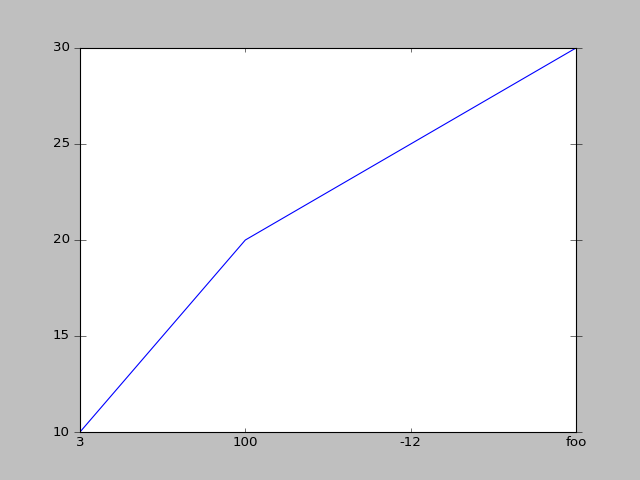

In [29]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [10, 20, 25, 30])

# Manually set ticks and tick labels *on the x-axis* (note ax.xaxis.set, not ax.set!)
ax.xaxis.set(ticks=range(1, 5), ticklabels=[3, 100, -12, "foo"]) 

# Make the y-ticks a bit longer and go both in and out...
ax.tick_params(axis='y', direction='inout', length=10)

plt.show()

A commonly-asked question is "How do I plot non-numerical categories?"
    
Currently, the easiest way to do this is to "fake" the x-values and then change the tick labels to reflect the category.

For example:

/home/brv/miniconda3/envs/dl/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


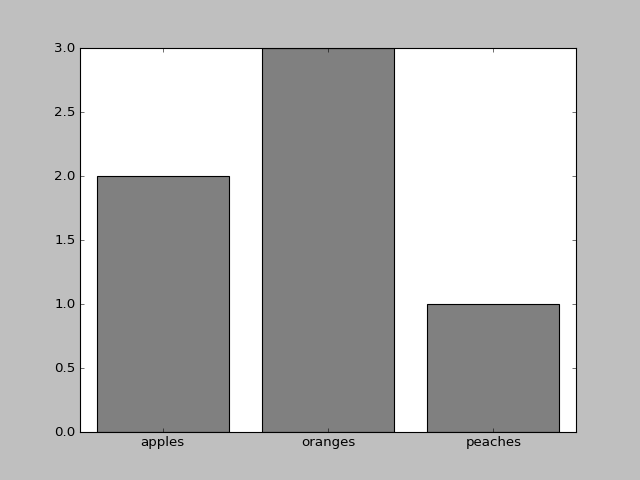

In [30]:
data = [('apples', 2), ('oranges', 3), ('peaches', 1)]
fruit, value = zip(*data)

fig, ax = plt.subplots()
x = np.arange(len(fruit))
ax.bar(x, value, align='center', color='gray')
ax.set(xticks=x, xticklabels=fruit)
plt.show()

## Subplot Spacing
The spacing between the subplots can be adjusted using [`fig.subplots_adjust()`](http://matplotlib.org/api/pyplot_api.html?#matplotlib.pyplot.subplots_adjust). Play around with the example below to see how the different arguments affect the spacing.

<IPython.core.display.Javascript object>


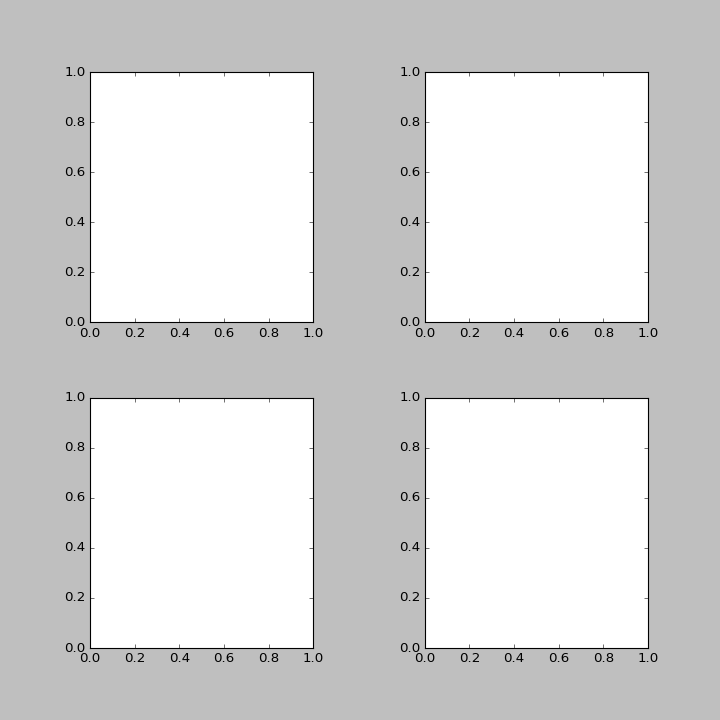

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(9, 9))
fig.subplots_adjust(wspace=0.5, hspace=0.3,
                    left=0.125, right=0.9,
                    top=0.9,    bottom=0.1)
plt.show()

A common "gotcha" is that the labels are not automatically adjusted to avoid overlapping those of another subplot. Matplotlib does not currently have any sort of robust layout engine, as it is a design decision to minimize the amount of "magical plotting". We intend to let users have complete, 100% control over their plots. LaTeX users would be quite familiar with the amount of frustration that can occur with automatic placement of figures in their documents.

That said, there have been some efforts to develop tools that users can use to help address the most common compaints. The "[Tight Layout](http://matplotlib.org/users/tight_layout_guide.html)" feature, when invoked, will attempt to resize margins and subplots so that nothing overlaps.

If you have multiple subplots, and want to avoid overlapping titles/axis labels/etc, `fig.tight_layout` is a great way to do so:

<IPython.core.display.Javascript object>


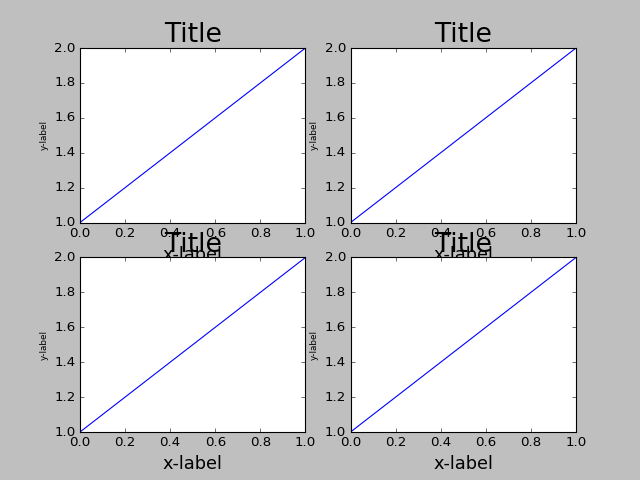

In [32]:
def example_plot(ax):
    ax.plot([1, 2])
    ax.set_xlabel('x-label', fontsize=16)
    ax.set_ylabel('y-label', fontsize=8)
    ax.set_title('Title', fontsize=24)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
example_plot(ax1)
example_plot(ax2)
example_plot(ax3)
example_plot(ax4)

# Enable fig.tight_layout to compare...
#fig.tight_layout()

plt.show()

## GridSpec
Under the hood, Matplotlib utilizes [`GridSpec`](http://matplotlib.org/api/gridspec_api.html) to lay out the subplots. While `plt.subplots()` is fine for simple cases, sometimes you will need more advanced subplot layouts. In such cases, you should use GridSpec directly. GridSpec is outside the scope of this tutorial, but it is handy to know that it exists. [Here](http://matplotlib.org/users/gridspec.html) is a guide on how to use it.

## Sharing axes
There will be times when you want to have the x axis and/or the y axis of your subplots to be "shared". Sharing an axis means that the axis in one or more subplots will be tied together such that any change in one of the axis changes all of the other shared axes. This works very nicely with autoscaling arbitrary datasets that may have overlapping domains. Furthermore, when interacting with the plots (panning and zooming), all of the shared axes will pan and zoom automatically.

<IPython.core.display.Javascript object>


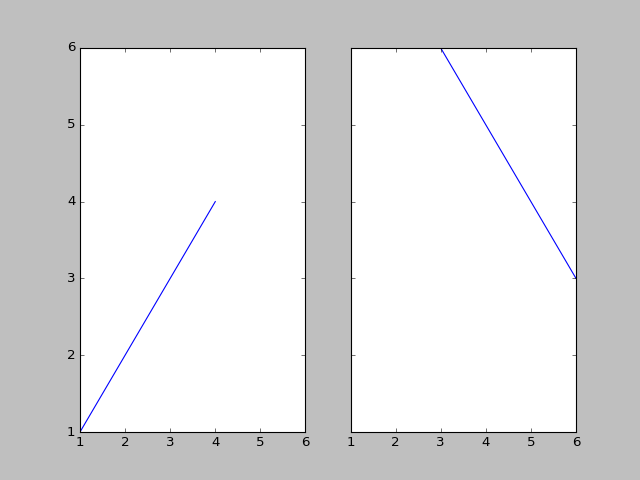

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2.plot([3, 4, 5, 6], [6, 5, 4, 3])
plt.show()

## "Twinning" axes
Sometimes one may want to overlay two plots on the same axes, but the scales may be entirely different. You can simply treat them as separate plots, but then twin them.

<IPython.core.display.Javascript object>


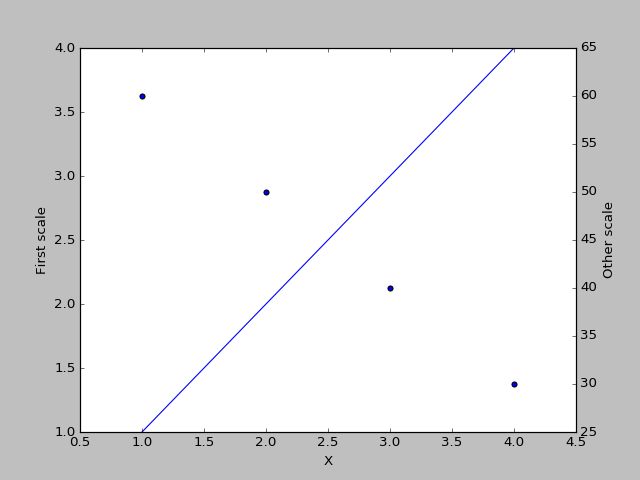

In [34]:
fig, ax1 = plt.subplots(1, 1)
ax1.plot([1, 2, 3, 4], [1, 2, 3, 4])
ax2 = ax1.twinx()
ax2.scatter([1, 2, 3, 4], [60, 50, 40, 30])
ax1.set(xlabel='X', ylabel='First scale')
ax2.set(ylabel='Other scale')
plt.show()

# Axis Spines
Spines are the axis lines for a plot. Each plot can have four spines: "top", "bottom", "left" and "right". By default, they are set so that they frame the plot, but they can be individually positioned and configured via the [`set_position()`](http://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) method of the spine. Here are some different configurations.

<IPython.core.display.Javascript object>


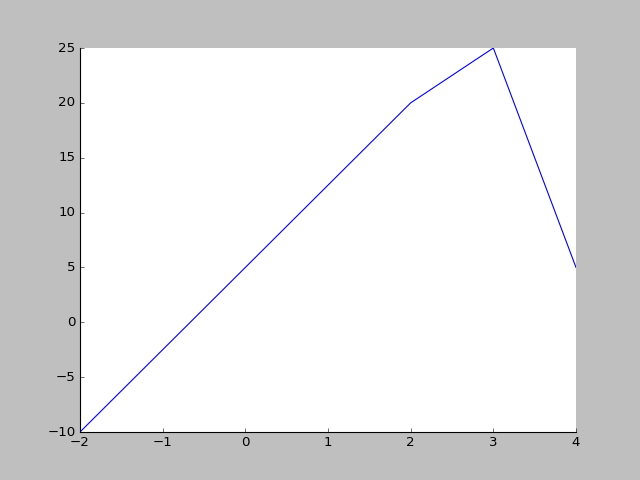

In [35]:
fig, ax = plt.subplots()
ax.plot([-2, 2, 3, 4], [-10, 20, 25, 5])
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')  # no ticklines at the top
ax.spines['right'].set_visible(False)
ax.yaxis.set_ticks_position('left')  # no ticklines on the right

# "outward"
# Move the two remaining spines "out" away from the plot by 10 points
#ax.spines['bottom'].set_position(('outward', 10))
#ax.spines['left'].set_position(('outward', 10))

# "data"
# Have the spines stay intersected at (0,0)
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))

# "axes"
# Have the two remaining spines placed at a fraction of the axes
#ax.spines['bottom'].set_position(('axes', 0.75))
#ax.spines['left'].set_position(('axes', 0.3))

plt.show()

# Exercise

This one is a bit trickier.  Once again, try to reproduce the figure below:

<img src="images/exercise_4-2.png">


A few key hints: The two subplots have no vertical space between them (this means that the `hspace` is `0`). Note that the bottom spine is at 0 in data coordinates and the tick lines are missing from the right and top sides.

Because you're going to be doing a lot of the same things to both subplots, to avoid repitive code you might consider writing a function that takes an `Axes` object and makes the spine changes, etc to it. 



In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Try to reproduce the figure shown in images/exercise_4.2.png
# This one is a bit trickier!

# Here's the data...
data = [('dogs', 4, 4), ('frogs', -3, 1), ('cats', 1, 5), ('goldfish', -2, 2)]
animals, friendliness, popularity = zip(*data)

In [ ]:
# Exercise

Once again, let's use a bit of what we've learned.  Try to reproduce the following figure:

<img src="images/exercise_4-1.png">

Hint: You'll need to combine `ax.axis(...)` and `ax.margins(...)`.  Here's the data and some code to get you started: